# 8a.nu Climbing logbook Analyses

I recently learned what is called CRISP-DM in data science, which stands for Cross-Industry Standard Process for Data Mining. It is an industry-proven way to guide data mining efforts. I would like to apply the concept on one of my favorite projects: Climging logbook Analyses.

CRISP is a life cycle on process, and it includes several phases between tasks on methodology. All around the data, the life cycle consists stages of 
1. Business Understanding
2. Data Understanding
3. Prepare Data 
4. Data Analysis
5. Evaluate the Results 

These stages may repeat several times as a cycle. It is flexible and can be customized to fit the particular needs. Then, eventually, it may go 

6. Deployment

Let's get it started!

## *- CRISP-DM 1. Business Understanding*

2021 the Olympic Games included rock climbing for the first time. It also attracted more people's attention to the sport. Whether new or experienced, a question that almost every climber wants to ask: How best I'd better climb?

I would like to open these kind of discussions from a data point of view. Analyzing the data one 8a.nu website, where it has one of the world's largest rock climbing community.
So three questions:
1. How long before I can climb on my first 6a, 7a or 8+?
2. How is my height compared with most climbers?
3. Where are the popular climbing places?

## *- CRISP-DM 2. Data Understanding*

The data can be accessed on "[kaggle 8a.nu Climbing Logbook](https://www.kaggle.com/dcohen21/8anu-climbing-logbook)". It was prepared by collecting the information on [8a.nu website](https://www.8a.nu/) by web-scraping. The 8a.nu website has one of the world's largest climbing communities online where climbers can record their climbs and check other's ascents here. 

This dataset was prepared in September 2017 by David Cohen, with information regarding users, their ascents, grades, body indexes, personal information, etc. It is provided in SQLite database, including 4 tabular data.

Based on the topics we are interested in, 
- for Q1, we will need columns to users and the grade and time of their ascents 
- for Q2, we will need columns to users and their height
- for Q3, we will need the ascent count and where was it done in the form of country and crag name

In [1]:
# LIBRARY IMPORTS
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os

%matplotlib inline

from scipy.stats import norm

In [2]:
# Read sqlite query results into a pandas DataFrame
def qry(q, connection = sqlite3.connect("./rawData/database.sqlite")):
    df = pd.read_sql_query(q, connection)
    connection.close
    return df

# prepare the dataframes
df_user = qry("SELECT * FROM USER")
df_grade = qry("SELECT * FROM grade")
df_method = qry("SELECT * FROM method")
df_ascent = qry("SELECT * FROM ascent")

df_user.to_csv('user.csv', index='False')
df_grade.to_csv('grade.csv', index='False')
df_method.to_csv('method.csv', index='False')
df_ascent.to_csv('ascent.csv', index='False')

# uncomment when the csv are prepared for direct read-in
#df_user = pd.read_csv('user.csv')
#df_grade = pd.read_csv('grade.csv')
#df_method = pd.read_csv('method.csv')
#df_ascent = pd.read_csv('ascent.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_ascent.head()

,Unnamed: 0,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,...,country,comment,rating,description,yellow_id,climb_try,repeat,exclude_from_ranking,user_recommended,chipped
0,0,2,1.0,36,NaN,0,3,0,545,918342000.0,...,THA,Thailand\n,0.0,NaN,255.0,0.0,0.0,0.0,0.0,0.0
1,1,3,1.0,36,NaN,0,3,0,545,925509600.0,...,NaN,\n,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4,1.0,36,NaN,0,3,0,545,933026400.0,...,SWE,\n,0.0,NaN,255.0,0.0,0.0,0.0,0.0,0.0
3,3,5,1.0,36,NaN,0,3,0,545,933026400.0,...,SWE,\n,0.0,NaN,255.0,0.0,0.0,0.0,0.0,0.0
4,4,6,1.0,36,NaN,0,3,0,545,933458400.0,...,NaN,\n,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_user.head()

,Unnamed: 0,id,first_name,last_name,city,country,sex,height,weight,started,...,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
0,0,1,first,last,Göteborg,SWE,0,177,73,1996,...,NaN,NaN,"Railay beach, Krabi, Thailand",NaN,NaN,NaN,1976-03-10,NaN,0,0
1,1,2,first,last,stockholm,SWE,0,0,0,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,2,3,first,last,Umeå,SWE,0,180,78,1995,...,NaN,NaN,Hell,Umeå,NaN,NaN,1973-09-09,NaN,0,0
3,3,4,first,last,Goteborg,SWE,1,165,58,2001,...,NaN,NaN,NaN,NaN,NaN,NaN,1984-07-26,NaN,0,0
4,4,5,first,last,North Attleboro,USA,0,0,0,1991,...,NaN,NaN,NaN,NaN,NaN,NaN,1969-05-07,NaN,0,0


# [Q1. How long before I can climb on my first 6a, 7a or 8+?]

## *- CRISP-DM 3. Data Preparation Q1*

In [5]:
# Merge and filter data to create interim dataset
df_interim = (
    df_ascent
    .merge(df_grade, how='inner', left_on='grade_id', right_on='id', suffixes=('_ascent', '_grade'))
    .loc[:, ['id_ascent', 'user_id', 'grade_id', 'fra_routes', 'date', 'name', 'climb_type']]  # select relevant columns for project
    .sort_values(by=['user_id', 'date'])
    .reset_index(drop=True)   
)

display(df_interim)

,id_ascent,user_id,grade_id,fra_routes,date,name,climb_type
0,18,1.0,40,6b,9.135036e+08,Be Careful,0
1,19,1.0,40,6b,9.139356e+08,Monkey Love,0
2,7,1.0,38,6a+,9.140220e+08,Valentine,0
3,20,1.0,40,6b,9.140220e+08,Short & Savage,0
4,35,1.0,42,6b+,9.140220e+08,Alone,0
...,...,...,...,...,...,...,...
4111872,4909513,67021.0,40,6b,1.504994e+09,Frodo,0
4111873,4909516,67021.0,42,6b+,1.504994e+09,Elvirita mi amor,0
4111874,4909537,67022.0,36,6a,1.505081e+09,L'auriculaire,1
4111875,4909911,67025.0,38,6a+,1.502575e+09,Malyjj bizon,0


In [6]:
# Process the grading system by merging some +/- and lower grades
sorted(set(df_interim['fra_routes'].tolist()), reverse=False)

['-',
 '2',
 '3a',
 '3b',
 '3c',
 '4a',
 '4b',
 '4c',
 '5a',
 '5b',
 '5c',
 '6a',
 '6a+',
 '6b',
 '6b+',
 '6c',
 '6c+',
 '7a',
 '7a+',
 '7b',
 '7b+',
 '7c',
 '7c+',
 '8a',
 '8a+',
 '8b',
 '8b+',
 '8c',
 '8c+',
 '8c+/9a',
 '8c/+',
 '9a',
 '9a+',
 '9b',
 '9b+',
 '9c']

In [7]:
# Merged grades
df_interim['grade_fra'] = df_interim.fra_routes.apply(lambda x: x.replace('+',''))
df_interim['grade_fra'] = df_interim.grade_fra.replace({'8a':'8', '8b':'8', '8c':'8', '8c/9a':'8', '8c/':'8', '9a':'8', '9b':'8', '9c':'8', 
                                                        '-':'4', '2':'4', '3a':'4', '3b':'4', '3c':'4', 
                                                        '4a':'4', '4b':'4','4c':'4'})
df_interim.grade_fra.value_counts()

7a    929917
7b    592196
6c    583313
6b    532052
6a    481695
7c    375686
8     253654
5c    140634
5b     86815
4      72099
5a     63816
Name: grade_fra, dtype: int64

- We will look at the two types of climbing and gender separately
- Select the first ascent at each leval for each climber
- The time interval from lower to higher grades need to be positive (remove negative)
- Time interval will be calculated, so that also means the data used for making the plots contains at least two climbs record (the average is 5.x).
- It should be noted that the climbers analyzed here, because who keep filling their climbing records, may be very good climbers.

In [8]:
## Begain to devide into several categories: RopeClimbing and Boulderin
def df_clean(df, climb_type):
    df_pivot = (
        df
        .loc[df['climb_type']==climb_type]
        .groupby(['user_id', 'grade_fra'])
        .nth(0, dropna=None) #select first ascent at each level for each climber
        # Because what we care about is the climb log that reach to the next level for the first time
        .reset_index()
        .pivot_table(index='user_id', columns='grade_fra', values='date')
        .reset_index()
    )
    
    df_clean = (
        df_pivot
        .merge(df_user.loc[:, ['id','sex','height']], how='inner', left_on='user_id', right_on='id')
        .drop(['id', 'user_id'], axis=1)
    )
    
    return df_clean


df_clean_rope = df_clean(df_interim, 0) #0 is rope climbing 
df_clean_bouldering = df_clean(df_interim, 1) #1 is bouldering

In [9]:
df_clean_rope

,4,5a,5b,5c,6a,6b,6c,7a,7b,7c,8,sex,height
0,NaN,NaN,NaN,NaN,9.140220e+08,9.135036e+08,9.165276e+08,9.142812e+08,9.224892e+08,9.656856e+08,9.890136e+08,0,177
1,NaN,NaN,NaN,NaN,NaN,9.913464e+08,9.913464e+08,9.913464e+08,NaN,NaN,NaN,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.072280e+08,8.361720e+08,8.571708e+08,9.334584e+08,0,180
3,NaN,NaN,NaN,NaN,1.155766e+09,NaN,1.128118e+09,1.063577e+09,1.057010e+09,1.085436e+09,1.088633e+09,1,165
4,1.303337e+09,1.376345e+09,1.303337e+09,1.377727e+09,1.059689e+09,6.942204e+08,8.992440e+08,7.889148e+08,7.258428e+08,7.940124e+08,8.836092e+08,0,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.469311e+09,1.504390e+09,NaN,NaN,0,0
30880,NaN,NaN,1.502489e+09,NaN,NaN,1.498255e+09,1.497478e+09,NaN,NaN,NaN,NaN,0,172
30881,1.500070e+09,NaN,1.488582e+09,1.488582e+09,1.499465e+09,1.488582e+09,1.497046e+09,1.462831e+09,1.487372e+09,NaN,NaN,0,178
30882,NaN,NaN,NaN,NaN,1.504303e+09,1.504303e+09,1.504390e+09,NaN,NaN,NaN,NaN,0,180


In [10]:
df_clean_bouldering

,4,5a,5b,5c,6a,6b,6c,7a,7b,7c,8,sex,height
0,1.010704e+09,1.021846e+09,1.010704e+09,1.019340e+09,1.017529e+09,1.018908e+09,1.010099e+09,1.022364e+09,NaN,NaN,NaN,0,177
1,NaN,NaN,NaN,9.466812e+08,NaN,9.939384e+08,9.920376e+08,NaN,NaN,NaN,NaN,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,9.229176e+08,9.229176e+08,9.886680e+08,NaN,NaN,0,180
3,NaN,NaN,NaN,NaN,1.155679e+09,1.155679e+09,NaN,NaN,NaN,NaN,NaN,1,165
4,1.428790e+09,1.078614e+09,1.025820e+09,1.112825e+09,1.003356e+09,8.256348e+08,8.571708e+08,9.470268e+08,9.202428e+08,1.141513e+09,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19248,1.485558e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
19249,NaN,NaN,NaN,NaN,1.467324e+09,1.502921e+09,1.502143e+09,NaN,NaN,NaN,NaN,0,0
19250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.491430e+09,1.491343e+09,1.491343e+09,0,185
19251,NaN,NaN,1.504822e+09,1.504822e+09,1.504822e+09,1.502230e+09,NaN,NaN,NaN,NaN,NaN,0,175


In [11]:
df_clean_rope_male = df_clean_rope[df_clean_rope['sex']==0].drop('sex', axis=1)
df_clean_rope_female = df_clean_rope[df_clean_rope['sex']==1].drop('sex', axis=1)

df_clean_bouldering_male = df_clean_bouldering[df_clean_bouldering['sex']==0].drop('sex', axis=1)
df_clean_bouldering_female = df_clean_bouldering[df_clean_bouldering['sex']==1].drop('sex', axis=1)

In [12]:
df_clean_rope_male

,4,5a,5b,5c,6a,6b,6c,7a,7b,7c,8,height
0,NaN,NaN,NaN,NaN,9.140220e+08,9.135036e+08,9.165276e+08,9.142812e+08,9.224892e+08,965685600.0,989013600.0,177
1,NaN,NaN,NaN,NaN,NaN,9.913464e+08,9.913464e+08,9.913464e+08,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.072280e+08,8.361720e+08,857170800.0,933458400.0,180
4,1.303337e+09,1.376345e+09,1.303337e+09,1.377727e+09,1.059689e+09,6.942204e+08,8.992440e+08,7.889148e+08,7.258428e+08,794012400.0,883609200.0,167
5,NaN,NaN,NaN,NaN,NaN,NaN,8.836092e+08,6.626844e+08,3.471516e+08,725842800.0,347151600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.469311e+09,1.504390e+09,NaN,NaN,0
30880,NaN,NaN,1.502489e+09,NaN,NaN,1.498255e+09,1.497478e+09,NaN,NaN,NaN,NaN,172
30881,1.500070e+09,NaN,1.488582e+09,1.488582e+09,1.499465e+09,1.488582e+09,1.497046e+09,1.462831e+09,1.487372e+09,NaN,NaN,178
30882,NaN,NaN,NaN,NaN,1.504303e+09,1.504303e+09,1.504390e+09,NaN,NaN,NaN,NaN,180


### Available data distributions

#### Rope Climbing

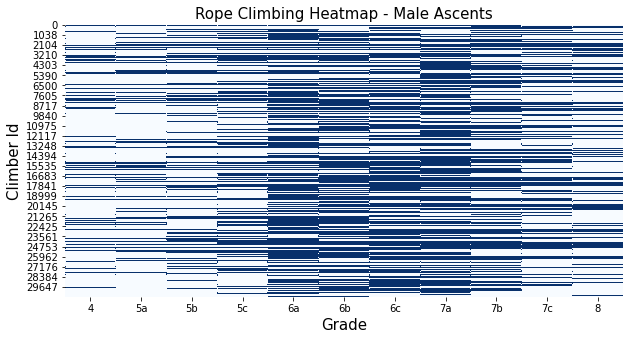

Blue indicates available data
Number of Climbs: 148119
Number Climbers: 26155
Average Climbs per Climber: 5.66


In [13]:
# Visualize avaialble data
plt.figure(figsize=(10, 5))
sns.heatmap(df_clean_rope_male
            .loc[:, ~df_clean_rope_male.columns.isin(['height'])]
            .notnull().applymap(lambda x: int(x)), cbar=False, cmap='Blues')
plt.title("Rope Climbing Heatmap - Male Ascents", fontsize=15)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Climber Id", fontsize=15)
plt.show()

print("Blue indicates available data")
print("Number of Climbs: {}".format(df_clean_rope_male.notnull().sum().sum()))
print("Number Climbers: {}".format(len(df_clean_rope_male)))
print("Average Climbs per Climber:", round(df_clean_rope_male.notnull().sum().sum()/len(df_clean_rope_male), 2))

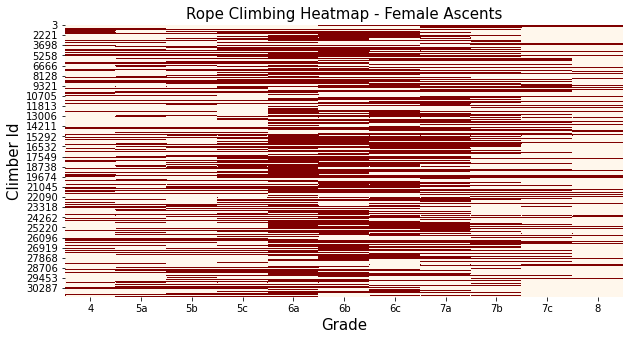

Red indicates available data
Number of Climbs: 26831
Number Climbers: 4726
Average Climbs per Climber: 5.68


In [14]:
# Visualize avaialble data
plt.figure(figsize=(10, 5))
sns.heatmap(df_clean_rope_female
            .loc[:, ~df_clean_rope_female.columns.isin(['height'])]
            .notnull().applymap(lambda x: int(x)), cbar=False, cmap='OrRd')
plt.title("Rope Climbing Heatmap - Female Ascents", fontsize=15)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Climber Id", fontsize=15)
plt.show()

print("Red indicates available data")
print("Number of Climbs: {}".format(df_clean_rope_female.notnull().sum().sum()))
print("Number Climbers: {}".format(len(df_clean_rope_female)))
print("Average Climbs per Climber:", round(df_clean_rope_female.notnull().sum().sum()/len(df_clean_rope_female), 2))

#### Bouldering

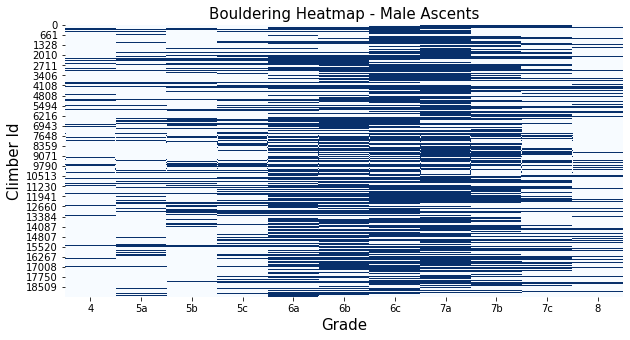

Blue indicates available data
Number of Climbs: 90022
Number Climbers: 16850
Average Climbs per Climber: 5.34


In [15]:
# Visualize avaialble data
plt.figure(figsize=(10, 5))
sns.heatmap(df_clean_bouldering_male
            .loc[:, ~df_clean_bouldering_male.columns.isin(['height'])]
            .notnull().applymap(lambda x: int(x)), cbar=False, cmap='Blues')
plt.title("Bouldering Heatmap - Male Ascents", fontsize=15)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Climber Id", fontsize=15)
plt.show()

print("Blue indicates available data")
print("Number of Climbs: {}".format(df_clean_bouldering_male.notnull().sum().sum()))
print("Number Climbers: {}".format(len(df_clean_bouldering_male)))
print("Average Climbs per Climber:", round(df_clean_bouldering_male.notnull().sum().sum()/len(df_clean_bouldering_male), 2))

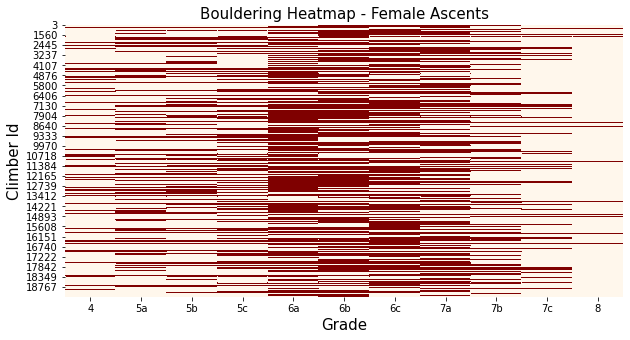

Red indicates available data
Number of Climbs: 12481
Number Climbers: 2402
Average Climbs per Climber: 5.2


In [16]:
# Visualize avaialble data
plt.figure(figsize=(10, 5))
sns.heatmap(df_clean_bouldering_female
            .loc[:, ~df_clean_bouldering_female.columns.isin(['height'])]
            .notnull().applymap(lambda x: int(x)), cbar=False, cmap='OrRd')
plt.title("Bouldering Heatmap - Female Ascents", fontsize=15)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Climber Id", fontsize=15)
plt.show()

print("Red indicates available data")
print("Number of Climbs: {}".format(df_clean_bouldering_female.notnull().sum().sum()))
print("Number Climbers: {}".format(len(df_clean_bouldering_female)))
print("Average Climbs per Climber:", round(df_clean_bouldering_female.notnull().sum().sum()/len(df_clean_bouldering_female), 2))

#### Two kinds of climbing comparison

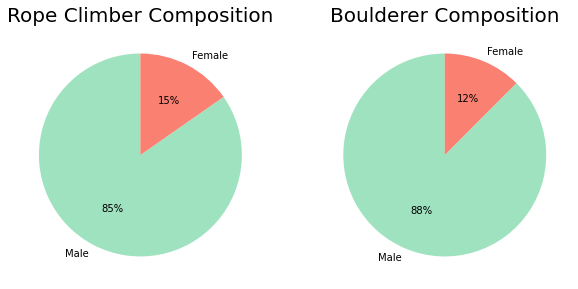

In [17]:
fig, axes = plt.subplots(1, 2, figsize =(10, 5)) 

data_rope = [26155, 4726] 
data_bouldering = [16850, 2402] 
colors = ['#9FE2BF', '#FA8072'] 
subjects = ['Male', 'Female'] 

axes[0].pie(data_rope, labels=subjects, colors=colors, autopct='%1.0f%%', startangle=90) 
axes[1].pie(data_bouldering, labels=subjects, colors=colors, autopct='%1.0f%%', startangle=90) 
axes[0].set_title('Rope Climber Composition', fontsize=20)
axes[1].set_title('Boulderer Composition', fontsize=20)

plt.show()

The rope climbing curves are composed of 96,115 men and 4,726 women. Curves on bouldering come from the climbs of 16,850 men 2,402 women. For data above grade 8, it is collapsed as one range.

## *- CRISP-DM 4. Data Analysis Q1*

### Process the time intervals betweeen grades

In [18]:
def df_diff_thresh(df_clean):
    df_diff = (
        df_clean
        .diff(axis=1)
        .applymap(lambda x: np.nan if x<0 else x) #remove negative time intervals
        .applymap(lambda x: x / (60*60*24)) #convert timestamps to days
        .drop('4', axis=1)
    )
    
    # Remove outliers
    thresh = df_diff.quantile(q=0.99, axis='index')
    mask = df_diff.apply(lambda row: row < thresh.values, axis=1)
    df_diff_thresh = df_diff[mask]
    return df_diff_thresh


df_diff_thresh_rope_male = df_diff_thresh(df_clean_rope_male.drop('height', axis=1))
df_diff_thresh_rope_female = df_diff_thresh(df_clean_rope_female.drop('height', axis=1))

df_diff_thresh_bouldering_male = df_diff_thresh(df_clean_bouldering_male.drop('height', axis=1))
df_diff_thresh_bouldering_female = df_diff_thresh(df_clean_bouldering_female.drop('height', axis=1))

In [19]:
df_diff_thresh_rope_male.head()

,5a,5b,5c,6a,6b,6c,7a,7b,7c,8
0,NaN,NaN,NaN,NaN,NaN,35.0,NaN,95.0,499.958333,270.000000
1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335.0,243.041667,882.958333
4,845.0,NaN,861.0,NaN,NaN,NaN,NaN,NaN,789.000000,1037.000000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
vals_rope_male = (
    df_diff_thresh_rope_male
    .mean()
    .cumsum()
)
errs_rope_male = (
    df_diff_thresh_rope_male
    .std()
)

vals_rope_female = (
    df_diff_thresh_rope_female
    .mean()
    .cumsum()
)
errs_rope_female = (
    df_diff_thresh_rope_female
    .std()
)

In [21]:
vals_bouldering_male = (
    df_diff_thresh_bouldering_male
    .mean()
    .cumsum()
)
errs_bouldering_male = (
    df_diff_thresh_bouldering_male
    .std()
)

vals_bouldering_female = (
    df_diff_thresh_bouldering_female
    .mean()
    .cumsum()
)
errs_bouldering_female = (
    df_diff_thresh_bouldering_female
    .std()
)

### Make plots for results

In [22]:
def drawer(df1, df2, err1, err2, label1, label2, xtitle):
    # Define colors for plot
    cmap = cm.Set2
    colors1 = []
    colors1.extend(cmap(np.linspace(0, 0.1, 3)))
    colors1.extend(cmap(np.linspace(0.25, 0.3, 3)))
    colors1.extend(cmap(np.linspace(0.15, 0.2, 3)))
    colors1.extend(cmap(np.linspace(0.95, 0.95, 1)))
    
    cmap = cm.Pastel2
    colors2 = []
    colors2.extend(cmap(np.linspace(0, 0.1, 3)))
    colors2.extend(cmap(np.linspace(0.25, 0.3, 3)))
    colors2.extend(cmap(np.linspace(0.15, 0.2, 3)))
    colors2.extend(cmap(np.linspace(0.95, 0.95, 1)))

    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(12.5, 7))

    # Creat Plots
    ax.set_facecolor('white')
    for i, c in enumerate(colors1):    
        ax.errorbar(
            df1[i], 
            i-0.075, 
            xerr=err1[i], 
            label=label1,
            color=c,
            fmt='s', 
            markersize=10,
            markeredgecolor='black',
            markeredgewidth=2.0,
            linewidth=4,
            ecolor=c,
            capsize=6
        )

    for i, c in enumerate(colors2):    
        ax.errorbar(
            df2[i], 
            i+0.085, 
            xerr=err2[i], 
            label=label2,
            color=c,
            fmt='o', 
            markersize=10,
            markeredgecolor='black',
            markeredgewidth=2.0,
            linewidth=4,
            ecolor=c,
            capsize=6
        )

    # Alter y-axis
    plt.yticks(
        np.arange(10),
        vals_rope_male.index
    )
    
    # Alter x-axis
    plt.xticks(
        np.arange(0, 10*365, 365/2.),
        ['Start','','1yr','','2yrs','','3yrs','','4yrs','','5yrs','','6yrs','','7yrs','','8yrs','','9yrs','']
    )
    plt.xlim((-0.1, 8.05*365))

    # Grid
    plt.grid(False, axis='y', which='both')
    plt.grid(True, axis='x', which='both', linestyle='--', linewidth=1)

    # Titles
    plt.ylabel("Grade", fontsize=20)
    plt.xlabel(xtitle, fontsize=20)

    # Font size
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)

    handles, labels = plt.gca().get_legend_handles_labels()
    i =1
    while i<len(labels):
        if labels[i] in labels[:i]:
            del(labels[i])
            del(handles[i])
        else:
            i +=1
    plt.legend(handles, labels)

    plt.show()

    fig.tight_layout()

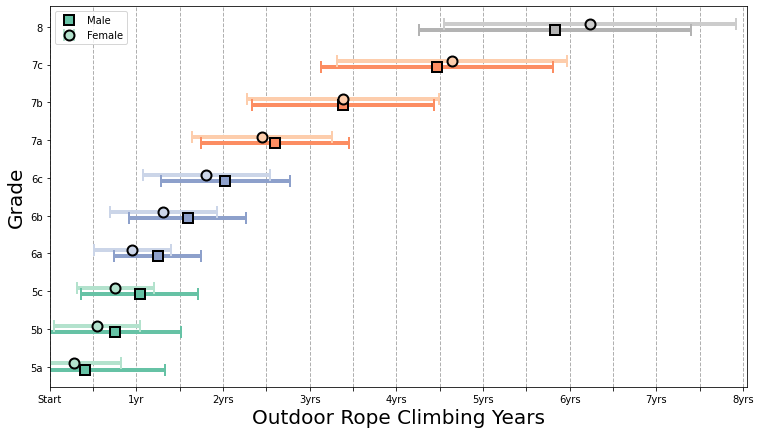

In [23]:
drawer(vals_rope_male, vals_rope_female, errs_rope_male, errs_rope_female,
       'Male','Female',"Outdoor Rope Climbing Years")

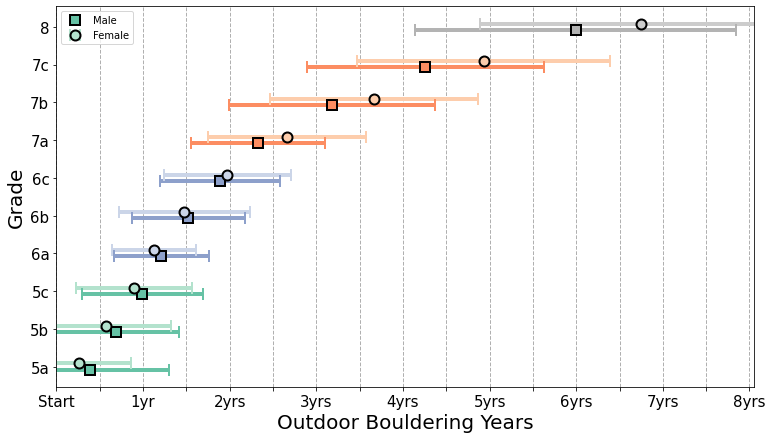

In [24]:
drawer(vals_bouldering_male, vals_bouldering_female, errs_bouldering_male, errs_bouldering_female,
       'Male','Female',"Outdoor Bouldering Years")

For example, as an average climber who starts to climb outdoors, it takes about 1 year 3 months for men and 1 year 5 months for women to send their first outdoor 6a. From here to the first 7a, it will take an extra 1 year 1 month for men and 1 year 3 months for women of bouldering outdoor.

In [25]:
# Print out the data points of the above figures:
print("Rope Climbing Plot Values:")
print("Male")
display(vals_rope_male/365)
display(errs_rope_male/365)
print("Female")
display(vals_rope_female/365)
display(errs_rope_female/365)

print("Bouldering Plot Values")
print("Male")
display(vals_bouldering_male/365)
display(errs_bouldering_male/365)
print("Female")
display(vals_bouldering_female/365)
display(errs_bouldering_female/365)

Rope Climbing Plot Values:
Male


5a    0.405651
5b    0.749355
5c    1.035153
6a    1.244584
6b    1.594013
6c    2.025908
7a    2.596758
7b    3.385721
7c    4.465625
8     5.834418
dtype: float64

5a    0.924251
5b    0.766983
5c    0.677256
6a    0.505482
6b    0.674825
6c    0.746887
7a    0.854945
7b    1.050847
7c    1.337023
8     1.570499
dtype: float64

Female


5a    0.282693
5b    0.545149
5c    0.756745
6a    0.952460
6b    1.311209
6c    1.807257
7a    2.448686
7b    3.386799
7c    4.642016
8     6.235442
dtype: float64

5a    0.536310
5b    0.500313
5c    0.449087
6a    0.447049
6b    0.617351
6c    0.728652
7a    0.813270
7b    1.110202
7c    1.324378
8     1.684165
dtype: float64

Bouldering Plot Values
Male


5a    0.384413
5b    0.692079
5c    0.992464
6a    1.210954
6b    1.524040
6c    1.888225
7a    2.324463
7b    3.181645
7c    4.258653
8     5.994403
dtype: float64

5a    0.916628
5b    0.718652
5c    0.694658
6a    0.547831
6b    0.655296
6c    0.692558
7a    0.771395
7b    1.188533
7c    1.365438
8     1.853221
dtype: float64

Female


5a    0.256167
5b    0.569036
5c    0.896018
6a    1.124019
6b    1.478294
6c    1.974229
7a    2.661925
7b    3.666555
7c    4.930175
8     6.752825
dtype: float64

5a    0.609399
5b    0.755507
5c    0.670249
6a    0.485175
6b    0.753961
6c    0.731434
7a    0.913830
7b    1.201702
7c    1.461075
8     1.865571
dtype: float64

## *- CRISP-DM 5. Evaluation the Results Q1*

Insights:
1. Like many skills, it will improve rapidly at first, and then the time required to improve will increase. Or instead, I like to see the level up of each grade as a non-linear growth.
2. The two climbing principles may not be completely equivalent in concept, but their curves are highly similar on a growth trend.
3. As you can imagine, the higher the level, the fewer people can climb, so does the error increases. Similarly, we have a smaller group of female climbers, and it makes the overall female prediction errors larger.
4. The difference on progress rate between men and women may exist or may be negligible, however, given the statistical error it has, it would be hard to say. In fact, it actually shows that the individual differences are greater than the gender differences.

- Caveat: Climbers who actively log their ascent activities on 8a.nu are probably going to be pretty good. So take the plot results as a driving force.

# [Q2. How is my height compared with most climbers?]

## *- CRISP-DM 3. Data Preparation Q2*

- We will separate genders
- Use the height information of all registration on the website, although many climbers did not write their heights down, but usually active users did.

In [26]:
# To remove that height information didn't fill
df_subset = df_user.loc[:, ['height', 'sex']]
df_subset = df_subset[(df_subset['height']>=120)&(df_subset['height']<=220)]

# getting data of the histogram
y_male, x_male = np.histogram(df_subset[df_subset['sex']==0]["height"], bins=100)
y_female, x_female = np.histogram(df_subset[df_subset['sex']==1]["height"], bins=100)


# finding the PDF of the histogram using count values
pdf_male = y_male / sum(y_male)
pdf_female = y_female / sum(y_female)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf_male = np.cumsum(pdf_male)
cdf_female = np.cumsum(pdf_female)

In [27]:
print(x_male, y_male)

[120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133.
 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161.
 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175.
 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189.
 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203.
 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217.
 218. 219. 220.] [  15    1    6    4    2    2    1    1    1    1   12    0    3    1
    4   10    1    5    4    3   23    3    9    1    6   15    9    3
    8    7   43   10   28   13   14   43   16   22   24   17  142   31
   74  107  114  373  140  297  474  365 1483  456 1068 1111  974 1841
 1137  925 1979  818 2595  771 1295 1353  722 1108  658  531  481  329
  521  136  183  170   92  109   60   35   44    9   50    2    7    2
    1    5    3    2    4    0    1    1    3    1    1    1

## *- CRISP-DM 4. Data Analysis Q2*

In [28]:
print(df_subset[df_subset['sex']==0].shape[0], " male climbers",
      df_subset[df_subset['sex']==1].shape[0], " female climbers")

25593  male climbers 3964  female climbers


### Median Value

In [29]:
print("Male median", df_subset[df_subset['sex']==0]['height'].median(axis=0), 
      "Female median", df_subset[df_subset['sex']==1]['height'].median(axis=0))

Male median 178.0 Female median 165.0


### Simple Gaussian fit

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Male Climbers: mean= 177.82 +/- 7.97 (cm)
Female Climbers: mean= 164.81 +/- 7.93 (cm)


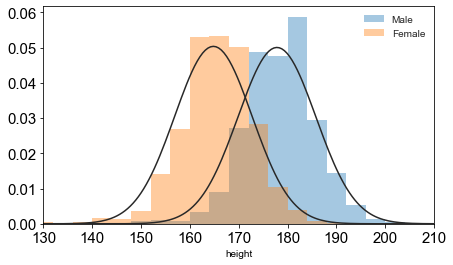

In [30]:
fig, ax = plt.subplots(figsize=(7,4))
plt.style.use('seaborn-whitegrid')

ax = sns.distplot(df_subset[df_subset['sex']==0]["height"], bins=25, fit=norm, kde=False, label='Male')
ax = sns.distplot(df_subset[df_subset['sex']==1]["height"], bins=25, fit=norm, kde=False, label='Female')
plt.legend()
ax.set(xlim=(130, 210))

print("Male Climbers: mean=",
      round(df_subset[df_subset['sex']==0].height.mean(), 2), "+/-", \
      round(df_subset[df_subset['sex']==0].height.std(), 2), "(cm)")

print("Female Climbers: mean=",
      round(df_subset[df_subset['sex']==1].height.mean(), 2), "+/-", \
      round(df_subset[df_subset['sex']==1].height.std(), 2), "(cm)")

Acatually, the distributions would be better described by asymmetric Gussian (skewed on the left). So I will seek Cumulative Distribution Functions to tell me more. 

### CDF distributions

I will also project several elite atheletes with different heights in the plots, hoping to provide you with some ideas.

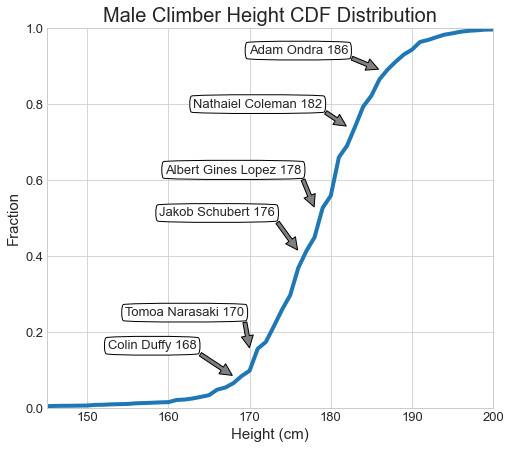

In [31]:
# plotting CDF
fig, ax = plt.subplots(figsize=(8,7))
plt.style.use('seaborn-whitegrid')

plt.plot(x_male[1:], cdf_male, label="CDF", linewidth=4)


# Mark where some elite atheletes are in the diagram, including:
# Colin Duffy 168cm
xval = 168
yval = cdf_male[x_male.tolist().index(xval)]
ann = ax.annotate("Colin Duffy 168",
                  xy=(xval, yval),
                  arrowprops=dict(facecolor='grey', shrink=0.03),
                  xytext=(xval-10, yval+0.08), xycoords='data', textcoords='data',
                  size=13, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w")
                  )

# Tomoa Narasaki 179cm
xval = 170
yval = cdf_male[x_male.tolist().index(xval)]
ann = ax.annotate("Tomoa Narasaki 170",
                  xy=(xval, yval),
                  arrowprops=dict(facecolor='grey', shrink=0.03),
                  xytext=(xval-8, yval+0.095), xycoords='data', textcoords='data',
                  size=13, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w")
                  )

# Jakob Schubert 176cm
xval = 176
yval = cdf_male[x_male.tolist().index(xval)]
ann = ax.annotate("Jakob Schubert 176",
                  xy=(xval, yval),
                  arrowprops=dict(facecolor='grey', shrink=0.03),
                  xytext=(xval-10, yval+0.1), xycoords='data', textcoords='data',
                  size=13, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w")
                  )

# Albert Gines Lopez 178cm
xval = 178
yval = cdf_male[x_male.tolist().index(xval)]
ann = ax.annotate("Albert Gines Lopez 178",
                  xy=(xval, yval),
                  arrowprops=dict(facecolor='grey', shrink=0.03),
                  xytext=(xval-10, yval+0.1), xycoords='data', textcoords='data',
                  size=13, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w")
                  )


# Nathaiel Coleman 182cm
xval = 182
yval = cdf_male[x_male.tolist().index(xval)]
ann = ax.annotate("Nathaiel Coleman 182",
                  xy=(xval, yval), 
                  arrowprops=dict(facecolor='grey', shrink=0.03),
                  xytext=(xval-11, 0.8), xycoords='data', textcoords='data',
                  size=13, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w")
                  )

# Adam Ondra 186cm
xval = 186
yval = cdf_male[x_male.tolist().index(xval)]
ann = ax.annotate("Adam Ondra 186",
                  xy=(xval, yval),
                  arrowprops=dict(facecolor='grey', shrink=0.03),
                  xytext=(xval-10, yval+0.05), xycoords='data', textcoords='data',
                  size=13, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w")
                  )


plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set(xlim=(145, 200), ylim=(-0.001, 1.001))
ax.set_title('Male Climber Height CDF Distribution', fontsize=20)
ax.set_xlabel('Height (cm)', fontsize=15)
ax.set_ylabel('Fraction', fontsize=15)

plt.show()

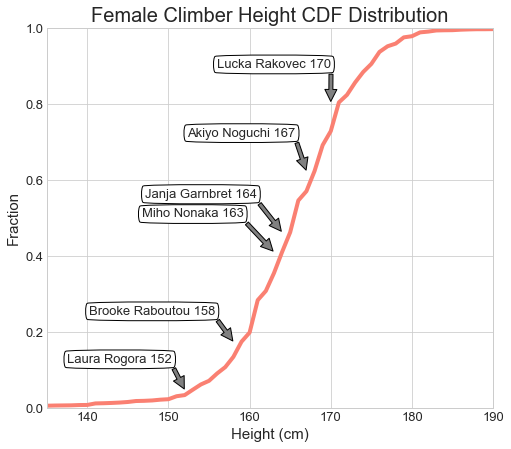

In [32]:
# plotting CDF
fig, ax = plt.subplots(figsize=(8,7))
plt.style.use('seaborn-whitegrid')

plt.plot(x_female[1:], cdf_female, label="CDF", color='salmon', linewidth=4)


# Mark where some elite atheletes are in the diagram, including:
# Laura Rogora 152cm
xval = 152
yval = cdf_female[x_female.tolist().index(xval)]
ann = ax.annotate("Laura Rogora 152",
                  xy=(xval, yval),
                  arrowprops=dict(facecolor='grey', shrink=0.03),
                  xytext=(xval-8, yval+0.08), xycoords='data', textcoords='data',
                  size=13, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w")
                  )

# Brooke Raboutou 158cm
xval = 158
yval = cdf_female[x_female.tolist().index(xval)]
ann = ax.annotate("Brooke Raboutou 158",
                  xy=(xval, yval),
                  arrowprops=dict(facecolor='grey', shrink=0.03),
                  xytext=(xval-10, yval+0.08), xycoords='data', textcoords='data',
                  size=13, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w")
                  )

# Miho Nonaka 163cm
xval = 163
yval = cdf_female[x_female.tolist().index(xval)]
ann = ax.annotate("Miho Nonaka 163",
                  xy=(xval, yval),
                  arrowprops=dict(facecolor='grey', shrink=0.03),
                  xytext=(xval-10, yval+0.1), xycoords='data', textcoords='data',
                  size=13, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w")
                  )

# Janja Garnbret 164cm
xval = 164
yval = cdf_female[x_female.tolist().index(xval)]
ann = ax.annotate("Janja Garnbret 164",
                  xy=(xval, yval),
                  arrowprops=dict(facecolor='grey', shrink=0.03),
                  xytext=(xval-10, yval+0.1), xycoords='data', textcoords='data',
                  size=13, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w")
                  )


# Akiyo Noguchi 167cm
xval = 167
yval = cdf_female[x_female.tolist().index(xval)]
ann = ax.annotate("Akiyo Noguchi 167",
                  xy=(xval, yval),
                  arrowprops=dict(facecolor='grey', shrink=0.03),
                  xytext=(xval-8, yval+0.1), xycoords='data', textcoords='data',
                  size=13, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w")
                  )

# Lucka Rakovec 170cm
xval = 170
yval = cdf_female[x_female.tolist().index(xval)]
ann = ax.annotate("Lucka Rakovec 170",
                  xy=(xval, yval),
                  arrowprops=dict(facecolor='grey', shrink=0.03),
                  xytext=(xval-7, yval+0.1), xycoords='data', textcoords='data',
                  size=13, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w")
                  )


plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set(xlim=(135, 190), ylim=(-0.001, 1.001))
ax.set_title('Female Climber Height CDF Distribution', fontsize=20)
ax.set_xlabel('Height (cm)', fontsize=15)
ax.set_ylabel('Fraction', fontsize=15)

plt.show()

## *- CRISP-DM 5. Evaluation the Results Q2*
Insights:

1. Cumulative distribution function (CDF) helps to quickly identify which height range you belong to among climbers, but it is not relevant to which height will be beneficial to climbing. It is more to help distinguishing a style or beta version that might be usful to you from others.
2. The medium height of male climbers is 178 cm and that of female is 165 cm. If the distribution fits in a simple Gaussian, the results are 177.8 ±8.0 cm and 164.8 ±7.9 cm respectively. It is also interesting to compare it with [contemporary national average](https://en.wikipedia.org/wiki/Average_human_height_by_country). For example, the height ratio of male to female is about 1.08 in the climbing community, consistent with many countries.

# [Q3. Where are the popular climbing places?]

## *- CRISP-DM 3. Data Preparation Q3*

- We will separate rock climbing and bouldering
- Things like ranking should pursue the latest data, so here we only look at the highest ones, and more at the proportions. The real-time ranking and the numbers can be accessed on the 8a.nu website.

In [33]:
num_ascent_rope = df_ascent[df_ascent['climb_type']==0].shape[0]
num_ascent_bouldering = df_ascent[df_ascent['climb_type']==1].shape[0]
print("total rope ascents:", num_ascent_rope)
print("total boudlering ascents:", num_ascent_bouldering)

total rope ascents: 2875676
total boudlering ascents: 1236202


In [34]:
def codeAscentInfo(code, climb_type, tops):
    '''
    INPUT: 
        code: Country code
        climb_type: 0 or 1, it represents rope climbing or bouldering
        tops: The amount of crags want to be shown
    OUTPUT:
        num_crag: How many cargs the country has in the climbing log
        compose_ascent: A dataframe, with columns of 'country', 'crag_name', 'frac_inCountry', 'frac_inAll'
                        'frac_inCountry'- the climbs here accounts for the proportion of all climbs in this country
                        'frac_inAll'- the climbs here accounts for the proportion of all climbs in the data
                        
    '''
    df = df_ascent[(df_ascent['climb_type']==climb_type)&(df_ascent['country']==code)]
    num_crag = df.crag.nunique()
    compose_ascent = round((df.crag.value_counts()/df.crag.value_counts().sum()), 3)[:tops] \
                          .rename_axis('crag_name').reset_index(name='frac_inCountry')
    frac_type = round((df.crag.value_counts()/df_ascent[df_ascent['climb_type']==climb_type].shape[0]), 3)[:tops].tolist()
    compose_ascent['frac_inAll'] = frac_type
    compose_ascent.insert(loc=0, column='country', value=code)
                            
    return num_crag, compose_ascent

## *- CRISP-DM 4. Data Analysis Q3*

### Rope climbing log done in countries of:

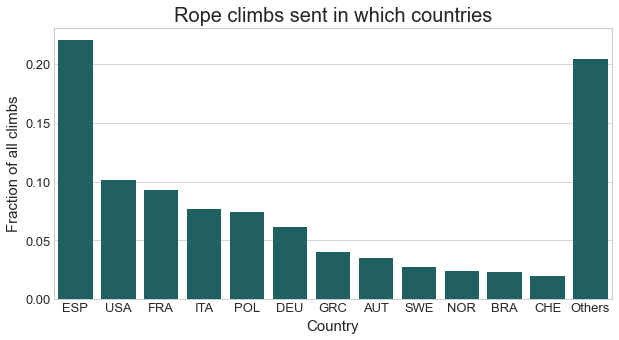

In [35]:
df_ascent_rope = (df_ascent[df_ascent['climb_type']==0].country.value_counts()/num_ascent_rope)[:12].rename_axis('where').reset_index(name='frac')
df_ascent_rope = df_ascent_rope.append({'where':'Others','frac':1-df_ascent_rope.frac.sum()}, ignore_index=True)

# Draw where ascents were sent:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="where", y="frac", data=df_ascent_rope,
                 color="teal", saturation=.5)
ax.set_title('Rope climbs sent in which countries', fontsize=20)
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel('Fraction of all climbs', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [36]:
# The top 3 coutries where they have the most rope climbing logs
df_ascent_rope[:3]

,where,frac
0,ESP,0.220105
1,USA,0.101584
2,FRA,0.092624


#### The top 3 countries where the most rope climbing routes had been sent are in Spain (22%), USA (10%), and France (9%).

### List 5 of the most popular crags in Spain, USA, France, and Greece

In [37]:
num_crag1, compose_ascent1 = codeAscentInfo('ESP', 0, 5)
compose_ascent1

,country,crag_name,frac_inCountry,frac_inAll
0,ESP,Rodellar,0.095,0.021
1,ESP,Margalef,0.079,0.017
2,ESP,Siurana,0.073,0.016
3,ESP,Cuenca,0.038,0.008
4,ESP,El Chorro,0.033,0.007


In [38]:
num_crag2, compose_ascent2 = codeAscentInfo('USA', 0, 5)
compose_ascent2

,country,crag_name,frac_inCountry,frac_inAll
0,USA,Red River Gorge,0.176,0.018
1,USA,New River Gorge,0.058,0.006
2,USA,Rifle,0.051,0.005
3,USA,Red Rocks,0.044,0.004
4,USA,Maple Canyon,0.043,0.004


In [39]:
num_crag3, compose_ascent3 = codeAscentInfo('FRA', 0, 5)
compose_ascent3

,country,crag_name,frac_inCountry,frac_inAll
0,FRA,Céüse,0.119,0.011
1,FRA,Gorges Du Tarn,0.100,0.009
2,FRA,St Léger,0.055,0.005
3,FRA,Orpierre,0.041,0.004
4,FRA,Chateauvert,0.025,0.002


In [40]:
num_crag7, compose_ascent7 = codeAscentInfo('GRC', 0, 5)
compose_ascent7

,country,crag_name,frac_inCountry,frac_inAll
0,GRC,Kalymnos,0.850,0.034
1,GRC,Leonidio,0.044,0.002
2,GRC,Pyli,0.007,0.000
3,GRC,Mouzaki,0.006,0.000
4,GRC,Lagada,0.005,0.000


### Bouldering log done in countries of:

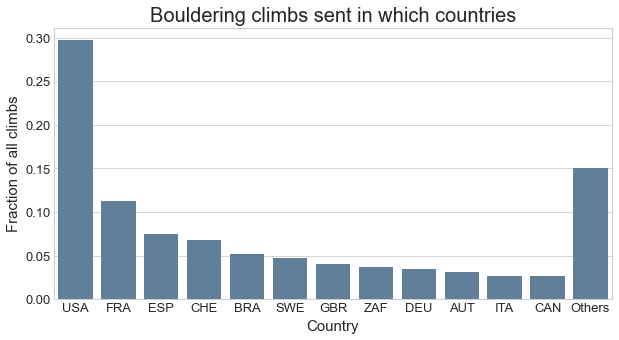

In [41]:
df_ascent_bouldering = (df_ascent[df_ascent['climb_type']==1].country.value_counts()/num_ascent_bouldering)[:12].rename_axis('where').reset_index(name='frac')
df_ascent_bouldering = df_ascent_bouldering.append({'where':'Others','frac':1-df_ascent_bouldering.frac.sum()}, ignore_index=True)

# Draw where ascents were sent:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="where", y="frac", data=df_ascent_bouldering,
                 color="steelblue", saturation=.5)
ax.set_title('Bouldering climbs sent in which countries', fontsize=20)
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel('Fraction of all climbs', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [42]:
# The top 3 coutries where they have the most bouldering logs
df_ascent_bouldering[:3]

,where,frac
0,USA,0.296634
1,FRA,0.112560
2,ESP,0.074953


#### The top 3 countries where the most bouldering problems had been sent are USA (30%), France (11%), and Spain (7%).

### List 5 of the most popular crags in USA, France, Spain, and Switzerland

In [43]:
num_crag1, compose_ascent1 = codeAscentInfo('USA', 1, 5)
compose_ascent1

,country,crag_name,frac_inCountry,frac_inAll
0,USA,Bishop,0.120,0.036
1,USA,Hueco Tanks,0.083,0.025
2,USA,Joe's Valley,0.055,0.016
3,USA,Little Rock City,0.054,0.016
4,USA,HP 40,0.033,0.010


In [44]:
num_crag2, compose_ascent2 = codeAscentInfo('FRA', 1, 5)
compose_ascent2

,country,crag_name,frac_inCountry,frac_inAll
0,FRA,Fontainebleau,0.818,0.092
1,FRA,Targassonne,0.054,0.006
2,FRA,Annot,0.030,0.003
3,FRA,Ailefroide,0.025,0.003
4,FRA,La Capelle,0.007,0.001


In [45]:
num_crag3, compose_ascent3 = codeAscentInfo('ESP', 1, 5)
compose_ascent3

,country,crag_name,frac_inCountry,frac_inAll
0,ESP,Albarracín,0.386,0.029
1,ESP,La Pedriza,0.055,0.004
2,ESP,El Escorial,0.049,0.004
3,ESP,Can Boquet,0.038,0.003
4,ESP,Zarzalejo,0.027,0.002


In [46]:
num_crag4, compose_ascent4 = codeAscentInfo('CHE', 1, 5)
compose_ascent4

,country,crag_name,frac_inCountry,frac_inAll
0,CHE,Chironico,0.251,0.017
1,CHE,Magic wood,0.242,0.017
2,CHE,Cresciano,0.154,0.011
3,CHE,Magic Wood,0.130,0.009
4,CHE,Brione,0.027,0.002


## *- CRISP-DM 5. Evaluation the Results Q3*
The top 3 countries where the most rope climbing routes had been sent are in Spain (22%), USA (10%), and France (9%). Same ranking for bouldering, are USA (30%), France (11%), and Spain (7%). The numbers only indicate which countries have most climbing logs have been recorded in the data. Some countries may have many crags, so there accumulate many climbs. Or it is just that most climbers in this community come from these countries and they climb nearby. So the crags I list below are the most popular within these countries, while it can not guarantee also be the most popular in the world. Moreover, the exact numbers change time by time when we have more climbs.

Nevertheless, when you happen to be in the US or in the East Europe, consider the following places to go:
- Rope climbing: Rodellar in Spain, Red River Gorge in the US, Céüse in France, and Kalymnos in Greece.
- Bouldering: Bishop in the US, Fontainbleau in France, and Albarracín in Spain.

## *- CRISP-DM 6. Deploy*
Deployment can be achieved by transferring methods into production or using the results to support an action. For this analysis, it could be developed for example as a dashboard showing the update-today climbing statistics distributions to stakeholders when more data arrives. Or, it could be used to take a kind of initiative, for example, if daily life is also an application scenario, proposing to your friends where they should go together with you for the next climbing trip.

If put into production, the code should be converted into executable scripts. Running on Jupyter notebook is more for demonstration. 